# Exercises

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
from sklearn import pipeline as pipe
import statsmodels.api as sm

### 1. Auto Dataset

In [5]:
df_auto=pd.read_csv('data/Auto.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [13]:
# Convert horsepower to numeric
df_auto['horsepower']=pd.to_numeric(df_auto['horsepower'], errors='coerce')
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [15]:
# Fit effect of horsepower on mpg
lm=sm.OLS.from_formula('mpg ~ horsepower', df_auto).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.03e-81
Time:                        14:32:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

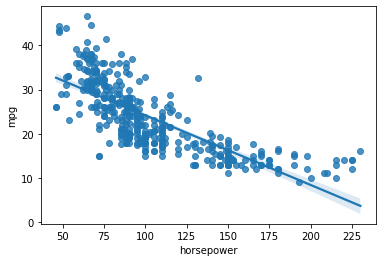

In [16]:
# Visualize regression
sns.regplot(x='horsepower', y='mpg', data=df_auto)

In [20]:
# Predicted mpg with horsepower of 98
lm.predict({'horsepower': 98})

0    24.467077
dtype: float64

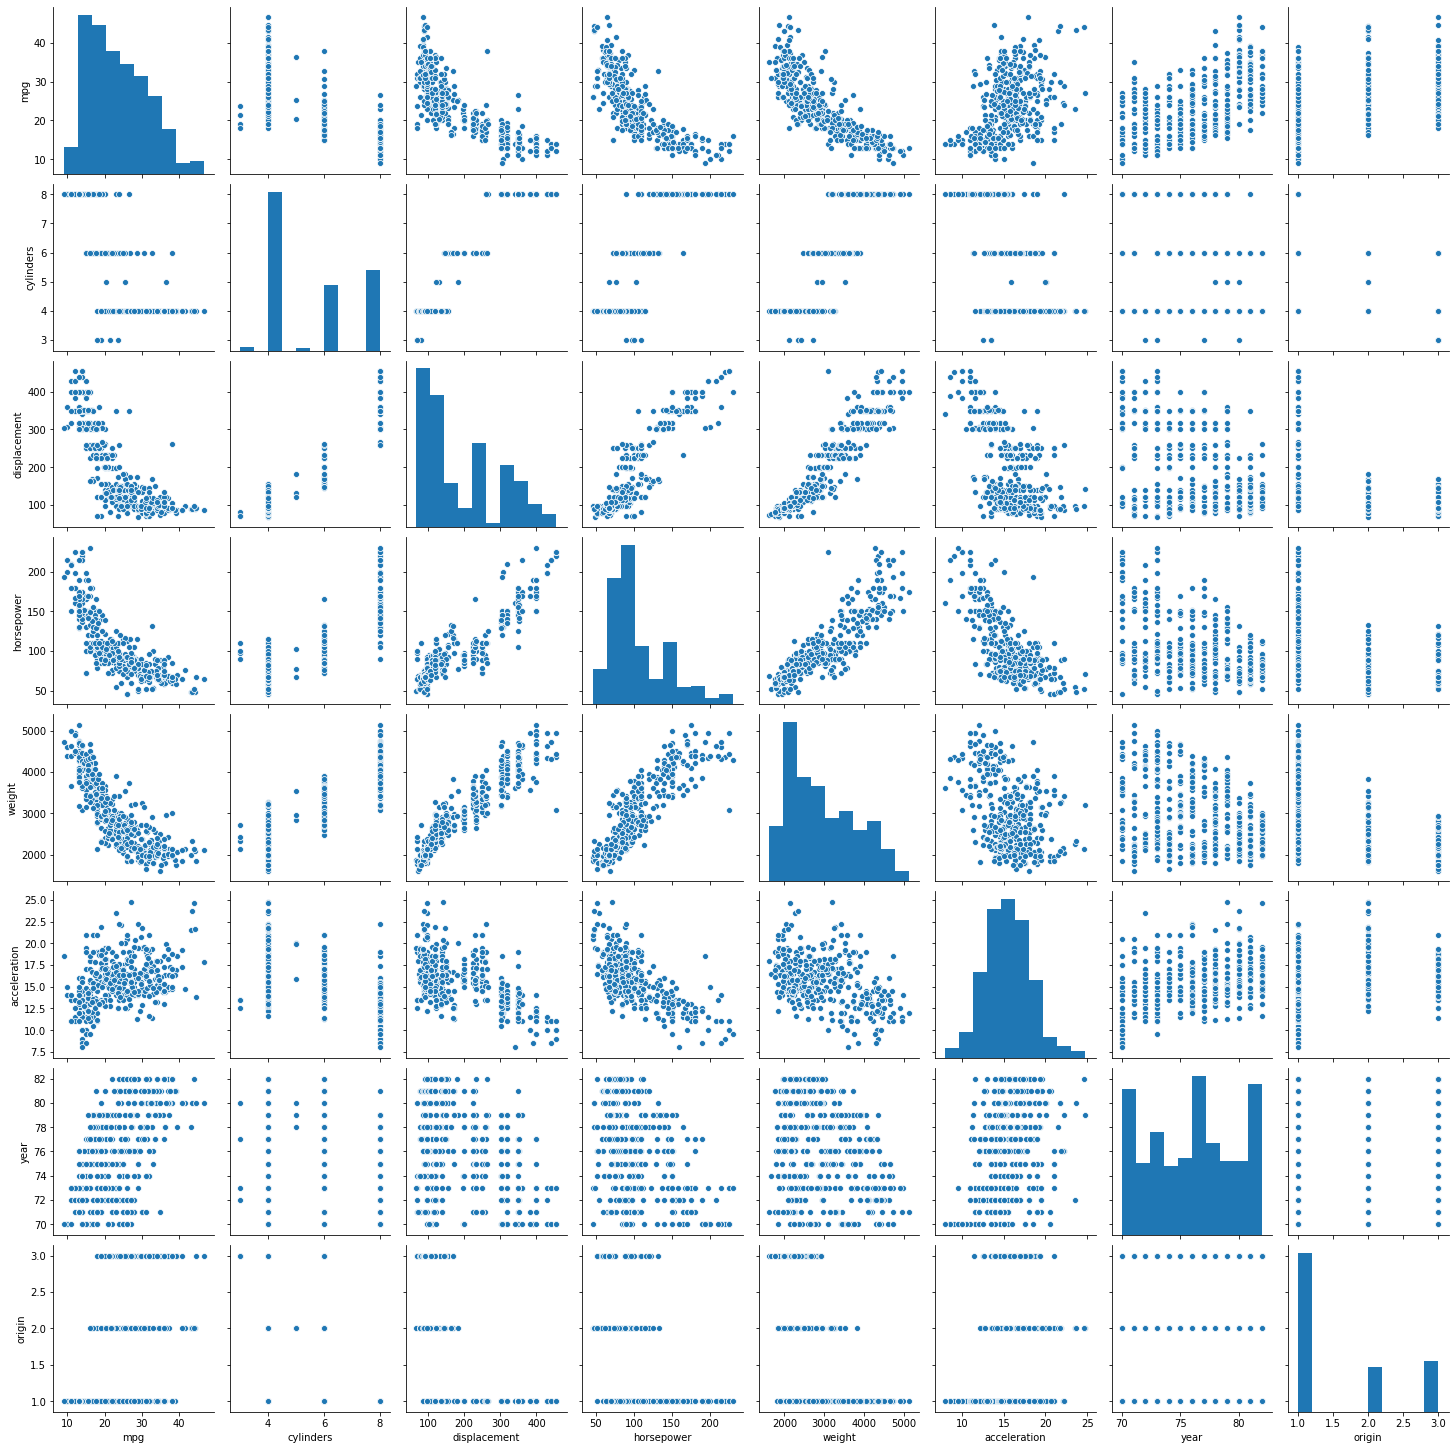

In [21]:
# Scatter plot matrix of all variables
sns.pairplot(data=df_auto)

In [22]:
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [39]:
# Multiple linear regression
# Predictors:
predictors='+'.join(df_auto.columns.drop(['name','mpg']))
predictors

'cylinders+displacement+horsepower+weight+acceleration+year+origin'

In [40]:
# Fit effect of alle vars except name on mpg
lm2=sm.OLS.from_formula('mpg ~'+predictors, df_auto).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        14:56:07   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# With interaction effects
lm2=sm.OLS.from_formula('mpg ~ (' + predictors + ')*(' + predictors + ')', df_auto).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          4.01e-155
Time:                        14:59:34   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [43]:
# Use following predictors: displacement, acceleration, year, origin, displacement:year, acceleration:origin
lm3=sm.OLS.from_formula('mpg ~ displacement + acceleration + year + origin + displacement:year + acceleration:origin', df_auto).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     270.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          1.27e-135
Time:                        15:04:30   Log-Likelihood:                -1053.8
No. Observations:                 397   AIC:                             2122.
Df Residuals:                     390   BIC:                             2150.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -42.1294      9.210     -4.574      0.000     -60.237     -24.022
displacement            0.1635      0.041      4.036      0.000       0.084       0.243
acceleration           -1.2207      0.188     -6.489      0.000      -1.591      -0.851
year                    1.2399      0.105     11.828      0.000       1.034       1.446
origin                -11.4461      1.745     -6.559      0.000     -14.877      -8.015
displacement:year      -0.0029      0.001     -5.364      0.000      -0.004      -0.002
acceleration:origin     0.7612      0.105      7.235      0.000       0.554       0.968
==============================================================================
Omnibus:                       56.436   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.228
Skew:                           0.651   Prob(JB):                     1.32e-36
Kurtosis:                       5.880   Cond. No.                     8.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
# Predict mpg based on model 
mpg_predict=lm3.predict()

NameError: name 'lm3' is not defined

Text(0, 0.5, 'Residuals')

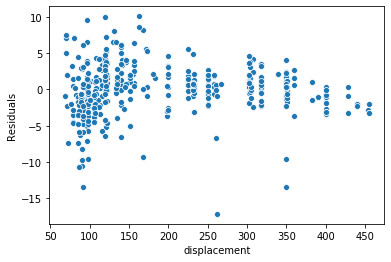

In [51]:
# Check residual plots
# Displacement
ax=sns.scatterplot(x=df_auto['displacement'], y=mpg_predict-df_auto['mpg'])
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

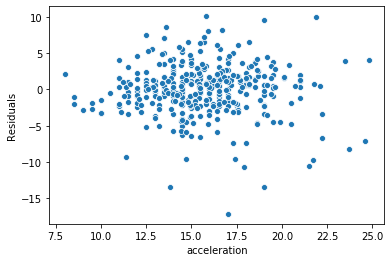

In [52]:
# acceleration
ax=sns.scatterplot(x=df_auto['acceleration'], y=mpg_predict-df_auto['mpg'])
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

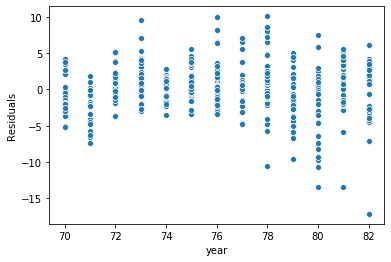

In [53]:
# year
ax=sns.scatterplot(x=df_auto['year'], y=mpg_predict-df_auto['mpg'])
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

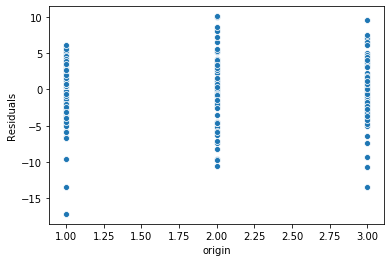

In [54]:
# origin
ax=sns.scatterplot(x=df_auto['origin'], y=mpg_predict-df_auto['mpg'])
ax.set_ylabel('Residuals')

In [68]:
# Try with log on acceleration
lm3=sm.OLS.from_formula('mpg ~ np.power(displacement,2) + np.log(acceleration) + year + origin + displacement:year + acceleration:origin', df_auto).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     306.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          3.82e-144
Time:                        15:21:16   Log-Likelihood:                -1033.8
No. Observations:                 397   AIC:                             2082.
Df Residuals:                     390   BIC:                             2109.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.9174      8.459     -0.581      0.561     -21.549      11.714
np.power(displacement, 2)     0.0001   2.03e-05      6.617      0.000    9.44e-05       0.000
np.log(acceleration)        -12.9441      2.690     -4.813      0.000     -18.232      -7.656
year                          1.0494      0.054     19.468      0.000       0.943       1.155
origin                       -8.4437      1.518     -5.562      0.000     -11.428      -5.459
displacement:year            -0.0016      0.000    -12.325      0.000      -0.002      -0.001
acceleration:origin           0.5370      0.093      5.754      0.000       0.354       0.721
==============================================================================
Omnibus:                       49.320   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.495
Skew:                           0.505   Prob(JB):                     9.50e-38
Kurtosis:                       6.048   Cond. No.                     3.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Collinearity

In [94]:
x1=stats.uniform().rvs(size=100)
x2=0.5*x1+0.1*stats.norm().rvs(size=100)
y=2+2*x1+0.3*x2+stats.norm().rvs(size=100)

In [95]:
df_sim=pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df_sim.head()

,x1,x2,y
0,0.274138,0.088498,1.740506
1,0.946612,0.424784,3.970516
2,0.132967,-0.019951,2.354791
3,0.968791,0.343723,5.180785
4,0.710621,0.404245,4.316758


In [96]:
# Fit linear regression model
lm_sim=sm.OLS.from_formula('y ~ x1 + x2', df_sim).fit()
lm_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     13.35
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.59e-06
Time:                        16:04:06   Log-Likelihood:                -141.62
No. Observations:                 100   AIC:                             289.2
Df Residuals:                      97   BIC:                             297.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1150      0.227      9.329      0.000       1.665       2.565
x1             1.6454      0.705      2.335      0.022       0.247       3.044
x2             0.3698      1.079      0.343      0.732      -1.771       2.511
==============================================================================
Omnibus:                        0.047   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.143
Skew:                          -0.048   Prob(JB):                        0.931
Kurtosis:                       2.842   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

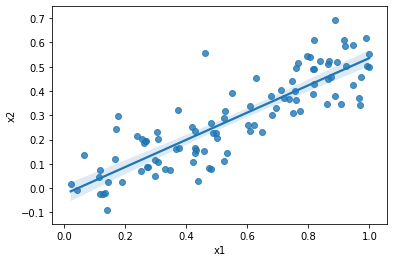

In [99]:
# Predictors are correlated
sns.regplot(x='x1', y='x2', data=df_sim)

In [98]:
df_sim.corr()

,x1,x2,y
x1,1.000000,0.860022,0.463499
x2,0.860022,1.000000,0.414348
y,0.463499,0.414348,1.000000


In [100]:
# Fit only on on x1
lm_sim=sm.OLS.from_formula('y ~ x1', df_sim).fit()
lm_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     26.81
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.20e-06
Time:                        16:11:12   Log-Likelihood:                -141.68
No. Observations:                 100   AIC:                             287.4
Df Residuals:                      98   BIC:                             292.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1053      0.224      9.402      0.000       1.661       2.550
x1             1.8531      0.358      5.178      0.000       1.143       2.563
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.136
Skew:                          -0.057   Prob(JB):                        0.934
Kurtosis:                       2.859   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Fit only on on x2
lm_sim=sm.OLS.from_formula('y ~ x2', df_sim).fit()
lm_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     20.31
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.82e-05
Time:                        16:11:28   Log-Likelihood:                -144.36
No. Observations:                 100   AIC:                             292.7
Df Residuals:                      98   BIC:                             297.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4110      0.192     12.544      0.000       2.030       2.792
x2             2.5363      0.563      4.507      0.000       1.420       3.653
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.056
Skew:                          -0.048   Prob(JB):                        0.972
Kurtosis:                       2.937   Cond. No.                         5.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""